# Logistic Regression for classification

### Import python libraries

In [13]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import sklearn libraries
from sklearn.linear_model import LogisticRegression

## Social Network Dataset

Source: datasets/social_network.csv

### Import dataset

In [14]:
# import dataset, ignore index column
dataset = pd.read_csv('datasets/social_network.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [15]:
# split dataset into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# print see first 5 rows of X and y
print(f'First 5 rows of X: {X[:5]}')
print(f'First 5 rows of y: {y[:5]}')

First 5 rows of X: [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
First 5 rows of y: [0 0 0 0 0]


### Visualize the dataset

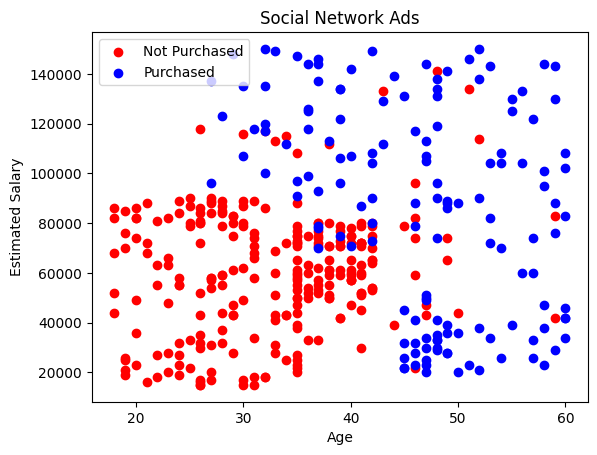

In [16]:
# visualize dataset
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', label = 'Not Purchased')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', label = 'Purchased')
plt.title('Social Network Ads')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### Preprocess dataset

In [22]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# print number of training and test set
print(f'Number of training set: {len(X_train)}')
print(f'Number of test set: {len(X_test)}')

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# print first 5 rows of X_train
print(f'First 5 rows of X_train: {X_train[:5]}')

# print first 5 rows of X_test
print(f'First 5 rows of X_test: {X_test[:5]}')



Number of training set: 320
Number of test set: 80
First 5 rows of X_train: [[-1.06675246 -0.38634438]
 [ 0.79753468 -1.22993871]
 [ 0.11069205  1.853544  ]
 [ 0.60129393 -0.90995465]
 [ 1.87685881 -1.28811763]]
First 5 rows of X_test: [[ 0.79753468 -1.40447546]
 [ 2.07309956  0.51542886]
 [-0.96863208 -0.76450736]
 [ 0.99377543  0.74814454]
 [-0.87051171 -1.22993871]]


### Develop logistic regression model

In [18]:
# Train Logistic Regression model on training set
log_classifier = LogisticRegression(random_state = 42)
log_classifier.fit(X_train, y_train)

# predict training set results
y_pred_train = log_classifier.predict(X_train)

# create y_out_train from y_pred_train and y_train
y_out_train = np.concatenate((y_pred_train.reshape(len(y_pred_train), 1), y_train.reshape(len(y_train), 1)), 1)

# print first 5 rows of y_out_train
print(f'Train vs Predicted: {y_out_train[:5]}')

Train vs Predicted: [[0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]]


In [19]:
# check performance on training set
from sklearn.metrics import confusion_matrix, accuracy_score

cm_train = confusion_matrix(y_train, y_pred_train)
print(f'Confusion Matrix: {cm_train}')

accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy_train}')


Confusion Matrix: [[190  15]
 [ 36  79]]
Accuracy: 0.840625


In [20]:
# Predict test set results
y_pred_test = log_classifier.predict(X_test)

# create y_out from y_test and y_pred
y_out_test = np.concatenate((y_test.reshape(len(y_test), 1), y_pred_test.reshape(len(y_pred_test), 1)), 1)

# print first 5 rows of y_out
print(f'Test vs Predicted:\n {y_out_test[:5]}')

Test vs Predicted:
 [[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


In [21]:
# check performance on test set
cm_test = confusion_matrix(y_test, y_pred_test)
print(f'Confusion Matrix: {cm_test}')

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy_test}')

Confusion Matrix: [[50  2]
 [ 9 19]]
Accuracy: 0.8625


## Iris Dataset

Source: sklearn.datasets -> load_iris

## Titanic dataset

Source: https://www.kaggle.com/c/titanic

## Pima Indians Diabetes Dataset

Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Wisconsin Breast Cancer Dataset

Source: sklearn.datasets -> load_breast_cance()

## Spambase dataset - UCI

Source:https://archive.ics.uci.edu/ml/datasets/spambase 